## Normallik Testleri

- Normallik sınamalarının amacı verilmiş bir veri dizisinin normal dağılıma uygunluk iyiliğinin incelenmesidir.
- Hipotezler şu şekilde kurulur:
- **H0:** Veri normal dağılıma uygundur.
- **H1:** Veri normal dağılıma uygun değildir.
- Bu çalışmada 3 çeşit normallik testi uygulayacağız.
- Shapiro-Wilk Testi- 
D’Agostino’s K^2 Tesi
- Anderson-Darling Testist

### 1)Shapiro-Wilk Testi

In [16]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
#Hyderabad'taki Hava Kalitesi: Kirlilik Analizi veri seti ile çalışalım
df = pd.read_csv("AQI Data Set.csv")
df.head(2)

,Id,Mounths,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,1,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0
1,2,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0


**Bu veri setindeki AQI (Hava Kalitesi Endeksi) değerlerinin normal dağılıma uyup uymadığını belirleyiniz. α=0.05**

- **H0:** Veri normal dağılmıştır.
- **H1:** Veri normal dağılmamıştır

In [33]:
#import shapiro
from scipy.stats import shapiro

In [37]:
df.isnull().sum()

Id                         0
Mounths                    0
PM10 in æg/m3              6
SO2 in æg/m3               1
NOx  in æg/m3              2
 PM2.5  in æg/m3           0
Ammonia - NH3  in æg/m3    0
O3   in æg/m3              0
CO  in mg/m3               0
 Benzene  in æg/m3         0
AQI                        5
dtype: int64

In [40]:
# Growth değişkenini seçelim
AQI = df['AQI'].dropna()

In [42]:
stat,p = stats.shapiro(AQI)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.977, p=0.263


In [45]:
alpha = 0.05
if p>alpha:
    print("H0 kabul edilir,veri normal dağılıma sahiptir.")
else:
    print("H1 kabul edilir,veri normal dağılıma sahip değildir.")

H0 kabul edilir,veri normal dağılıma sahiptir.


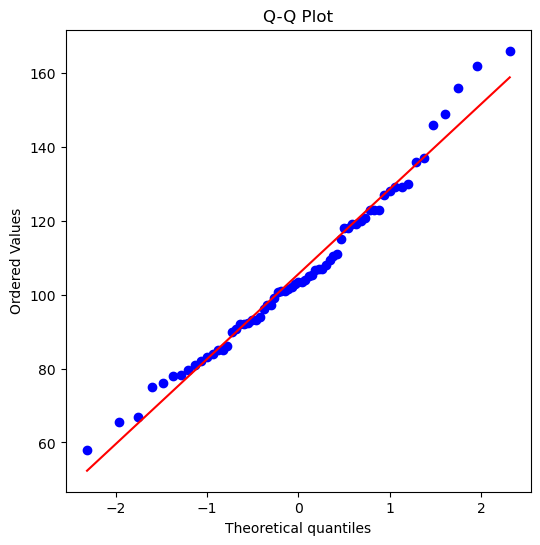

In [52]:
# Q-Q plot ile görelim , Q-Q Plot, bir dağılımın, teorik olarak beklenen herhangi bir dağılım türü ile uyumlu olup olmadığını değerlendirmek için kullanılır.
plt.figure(figsize=(6, 6))
stats.probplot(AQI, dist="norm", plot=plt);
plt.title("Q-Q Plot")
plt.show()

**CO (Karbon Monoksit) konsantrasyonlarının normal dağılıma uyup uymadığını test ediniz. α=0.05**
- **H0:** Veri normal dağılmıştır.
- **H1:** Veri normal dağılmamıştır

In [56]:
stat,p = stats.shapiro(df["CO  in mg/m3"])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.853, p=0.000


In [58]:
alpha = 0.05
if p>alpha:
    print("H0 kabul edilir,veri normal dağılıma sahiptir.")
else:
    print("H1 kabul edilir,veri normal dağılıma sahip değildir.")

H1 kabul edilir,veri normal dağılıma sahip değildir.


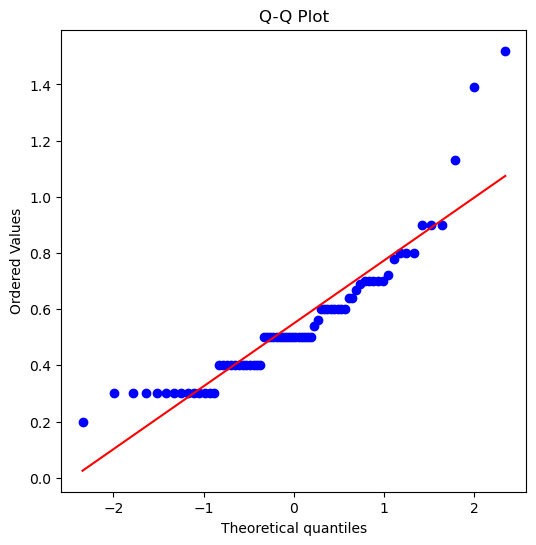

In [62]:
plt.figure(figsize=(6, 6))
stats.probplot(df['CO  in mg/m3'], dist="norm", plot=plt);
plt.title("Q-Q Plot")
plt.show()

### 2)D’Agostino’s K^2 Testi

In [87]:
#Amerika'da İşsizlik, ABD Eyaletlerine Göre
df = pd.read_csv("Unemployment in America Per US State.csv")
df.head(2)

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1


**İşsizlik oranının normal dağılıp dağılmadığını test ediniz. α=0.05**
- **H0:** Veri normal dağılmıştır.
- **H1:** Veri normal dağılmamıştır


In [91]:
# İşsizlik oranlarını içeren sütun
unemployment_rates = df['Percent (%) of Labor Force Unemployed in State/Area']

In [93]:
unemployment_rates.isnull().sum()

0

In [99]:
from scipy.stats import normaltest

In [103]:
stat, p = normaltest(unemployment_rates)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=5637.280, p=0.000


In [108]:
if p > 0.05:
 print('H0 kabul edilir.Veri normal dağılmıştır.')
else:
 print('H0 reddedilir.Veri normal dağılmamıştır.')

H0 reddedilir.Veri normal dağılmamıştır.


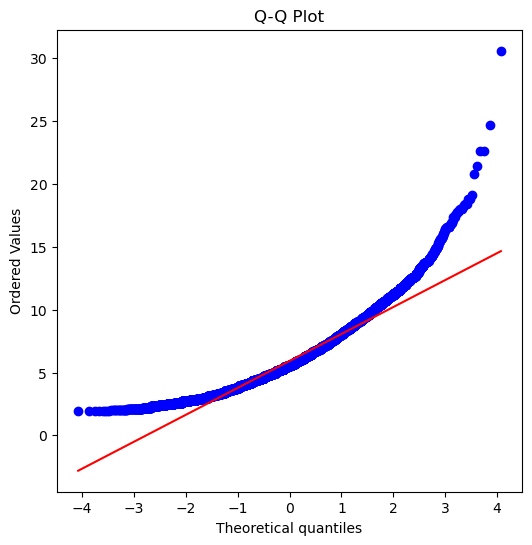

In [112]:
plt.figure(figsize=(6, 6))
stats.probplot(unemployment_rates, dist="norm", plot=plt);
plt.title("Q-Q Plot")
plt.show()

**İstihdam oranının normal dağılıma uygun olup olmadığını test ediniz.**
- **H0:** Veri normal dağılmıştır.
- **H1:** Veri normal dağılmamıştır

In [115]:
# İstihdam oranlarını içeren sütunları seçin
employment_rates = df['Percent (%) of Labor Force Employed in State/Area']

In [117]:
employment_rates.isnull().sum()

0

In [119]:
stat, p = normaltest(unemployment_rates)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=5637.280, p=0.000


In [121]:
if p > 0.05:
 print('H0 kabul edilir.Veri normal dağılmıştır.')
else:
 print('H0 reddedilir.Veri normal dağılmamıştır.')

H0 reddedilir.Veri normal dağılmamıştır.


### 3)Anderson-Darling Testi

In [123]:
#Pima Kızılderilileri Diyabet Veritabanı
df = pd.read_csv("diabetes.csv")
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


**Glikoz seviyelerinin normal dağılıma uygun olup olmadığını test ediniz.**
- **H0:** Veri normal dağılmıştır.
- **H1:** Veri normal dağılmamıştır

In [128]:
glucose_levels = df['Glucose']

In [130]:
glucose_levels.isnull().sum()

0

In [132]:
ad_test = stats.anderson(glucose_levels, dist='norm')
print("Anderson-Darling Testi: Test istatistiği = {}".format(ad_test.statistic))

Anderson-Darling Testi: Test istatistiği = 5.965074622477118


In [136]:
for i in range(len(ad_test.critical_values)):
 sl, cv = ad_test.significance_level[i], ad_test.critical_values[i]
 if ad_test.statistic < ad_test.critical_values[i]:
     print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
 else:
     print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

15.000: 0.573, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.783, data does not look normal (reject H0)
2.500: 0.913, data does not look normal (reject H0)
1.000: 1.086, data does not look normal (reject H0)


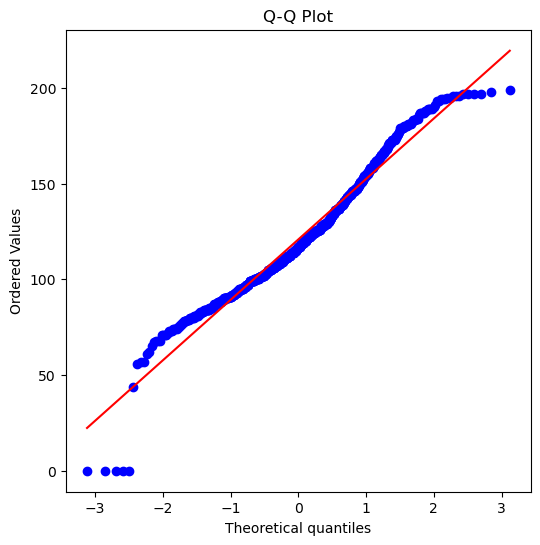

In [138]:
plt.figure(figsize=(6, 6))
stats.probplot(glucose_levels, dist="norm", plot=plt);
plt.title("Q-Q Plot")
plt.show()

**Vücut kitle indeksinin normal dağılıma uygun olup olmadığını test edin**
- **H0:** Veri normal dağılmıştır.
- **H1:** Veri normal dağılmamıştır

In [156]:
bmi_values = df['BMI']

In [158]:
ad_test = stats.anderson(bmi_values, dist='norm')
print("Anderson-Darling Testi: Test istatistiği = {}".format(ad_test.statistic))


Anderson-Darling Testi: Test istatistiği = 4.1891562244597935


In [160]:
for i in range(len(ad_test.critical_values)):
 sl, cv = ad_test.significance_level[i], ad_test.critical_values[i]
 if ad_test.statistic < ad_test.critical_values[i]:
     print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
 else:
     print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

15.000: 0.573, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.783, data does not look normal (reject H0)
2.500: 0.913, data does not look normal (reject H0)
1.000: 1.086, data does not look normal (reject H0)


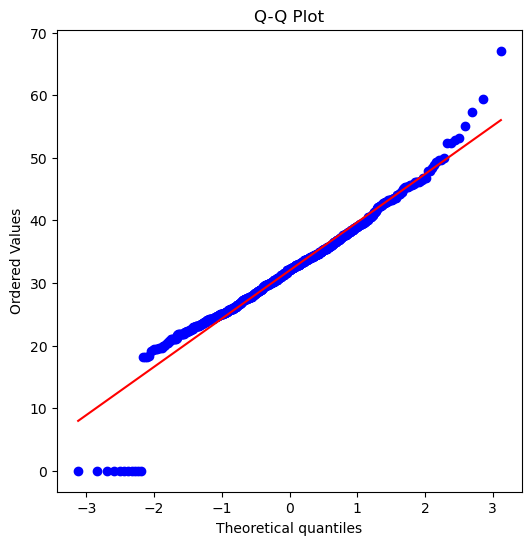

In [164]:
plt.figure(figsize=(6, 6))
stats.probplot(bmi_values, dist="norm", plot=plt);
plt.title("Q-Q Plot")
plt.show()